<a href="https://colab.research.google.com/github/luanatocchio/Data-Science-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Diabetes Usando *Machine Learning*

-----

Link dataset: [Diabetes, Hypertension and Stroke Prediction](https://https://www.kaggle.com/datasets/prosperchuks/health-dataset)

Referência: [Diabetes Prediction Using Machine Learning](https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/)

-----



## 1. Visão Geral

O diabetes é uma doença crônica que afeta milhões de pessoas no Brasil. De acordo com a Sociedade Brasileira de Diabetes, cerca de 13 milhões de brasileiros têm a doença, o que representa cerca de 6,9% da população. Os principais fatores que podem levar ao diabetes são o sedentarismo, a obesidade, a má alimentação e o histórico familiar da doença. A prevenção e o tratamento são fundamentais para controlar a doença, por meio de hábitos saudáveis, como a prática regular de exercícios físicos e alimentação balanceada, além do acompanhamento médico especializado.

Neste trabalho realizaremos a análise exploratória e aplicação de dois modelos de *machine learning* (ML) no *dataset* **Diabetes**, obtido no Kaggle, a fim de prever se o paciente **tem ou não diabetes** e definir se os modelos escolhidos estão aptos a serem aplicados na produção.

As etapas realizadas foram:

- Importação do *dataset*;
- Limpeza e análise exploratória;
- Teste de modelos de ML;
- Otimização de hiperparâmetros escolhidos;
- Aplicação dos modelos nos dados de teste.

## 2. Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, GridSearchCV, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## 3. Limpeza e Análise Exploratória

A análise exploratória foi realizada no *dataset* para maior conhecimento e compreensão dos dados e como eles estão distribuídos e ordenados dentro do conjunto.

In [ ]:
url_dataset = 'https://raw.githubusercontent.com/cmd1301/polo_tech_by_ada/main/modulo_05/project/diabetes_data.csv'

Leitura dos dados

In [ ]:
df = pd.read_csv(url_dataset)
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


Informações sobre cada uma das colunas do *dataset*, assim como o tipo de cada uma destas colunas e se há valores Null.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Principais parâmetros e informações estatísticas sobre o *dataset*.

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


É possível observar que em muitas colunas os valores mínimos são "0" e os máximos "1", o que leva à conclusão de que se trata de um *dataset* já normalizado. Os valores que saem da lógica binária 0-1 são aqueles referentes ao "Índice de Massa Corpórea" (IMC), apresentado como **BMI** no *dataset*, **GenHlth**, que se trata de uma nota variando de 1 a 5 de como está sua saúde de forma geral; **MenHlth** e **PhysHlth**, novamente dentro de uma escala as pessoas avaliaram com uma nota sua saúde física e mental de forma geral.

Em seguida foi feita a contagem de valores "NaN", que resultou em zero.

In [ ]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

Por fim, foi verificado que os valores da variável *target* possuíam a mesma quantidade, ou seja o *dataset* já estava balanceado, indicando que pode se tratar de um *dataset* fictício.

In [ ]:
df['Diabetes'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

Assim, foi concluída a análise exploratória e nenhuma limpeza precisou ser feita. O *dataset* já estava limpo e ideal para aplicação dos algoritmos de aprendizado de máquina.

Desta forma, foi analisada a correlação linear entre as colunas.

In [ ]:
df.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


Visto de uma forma mais gráfica, temos o *heatmap* com sua respectiva legenda.

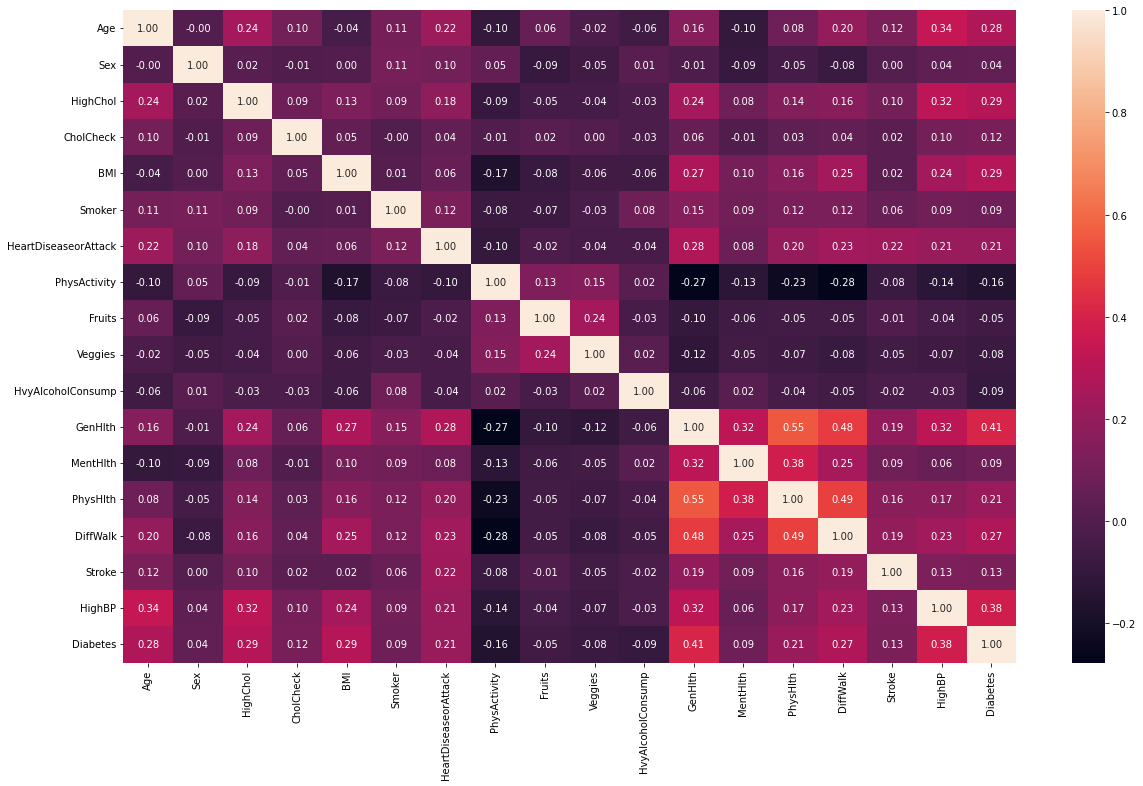

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', ax=ax)
plt.show()

## 4. Teste Modelos de ML

___________________
___________________

**Primeiro modelo**: Regressão Logística

Baseline utilizando a Regressão Logística:

In [ ]:
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
modelo_logistica = LogisticRegression(max_iter=300)
modelo_logistica.fit(X_train, y_train)
y_pred = modelo_logistica.predict(X_test)

[[6396 2434]
 [2040 6803]]


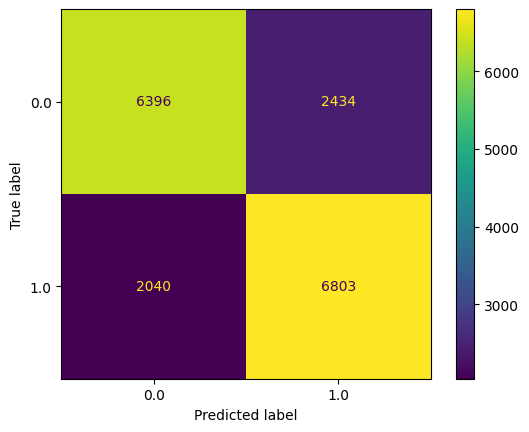

In [ ]:
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      8830
         1.0       0.74      0.77      0.75      8843

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



Neste caso temos que a acurácia de previsão do modelo é de 75%, e o recall, que seria a razão entre os valores "verdadeiro positivos" sobre os verdadeiros e falsos positivos, foi de 77%. Por se tratar de um provável diagnóstico, esses valores ainda não são bons os suficiente dado que, a cada 100 testes em pessoas com diabetes, 23 terão seu resultado como negativo (um falso positivo). A ideia de otimizar os parâmetros é aumentar este número, reduzindo o número de "falsos negativos".

____________
____________

Regressão Logística utilizando otimização de hiperparâmetros usando todas as colunas do dataset. Os hiperparâmetros escolhidos para otimização são adequados para um dataset não-multi-class.

In [ ]:
# Regressão Logísica, utilizando todas as features do dataset, com escalonamento e otimização de hiperparâmetros:

X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("logreg", LogisticRegression())]

pipe = Pipeline(lista_etapas)

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metrica = make_scorer(recall_score)

logreg_params = {"logreg__penalty" : ["l1", "l2"],
                  "logreg__solver" : ["lbfgs", "liblinear"],
                  "logreg__max_iter" : range(300, 1000, 100)}

logreg_grid = GridSearchCV(estimator=pipe, param_grid=logreg_params, scoring=metrica, cv=splitter)

logreg_grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__max_iter': range(300, 1000, 100),
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['lbfgs', 'liblinear']},
             scoring=make_scorer(recall_score))

In [ ]:
print("Logistic Regression best hyperparameters: ", logreg_grid.best_params_)

logreg_recall = cross_val_score(logreg_grid.best_estimator_, X_train, y_train, cv=splitter, scoring=metrica)
logreg_accuracy = cross_val_score(logreg_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='accuracy')

print("Logistic Regression mean recall score: ", logreg_recall.mean())
print("Logistic Regression mean accuracy score: ", logreg_accuracy.mean())

Logistic Regression best hyperparameters:  {'logreg__max_iter': 600, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Logistic Regression mean recall score:  0.7677703847665514
Logistic Regression mean accuracy score:  0.7477507344472695


In [ ]:
df_logreg_grid = pd.DataFrame(logreg_grid.cv_results_)
df_logreg_grid.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__max_iter,param_logreg__penalty,param_logreg__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.300472,0.136413,0.030522,0.009835,600,l1,liblinear,"{'logreg__max_iter': 600, 'logreg__penalty': '...",0.75471,0.777148,0.765413,0.777196,0.764573,0.767808,0.008522,1
23,0.154585,0.007263,0.014470,0.001098,800,l2,liblinear,"{'logreg__max_iter': 800, 'logreg__penalty': '...",0.75471,0.776959,0.765413,0.777009,0.764761,0.767771,0.008426,2
19,0.188360,0.015599,0.029573,0.002259,700,l2,liblinear,"{'logreg__max_iter': 700, 'logreg__penalty': '...",0.75471,0.776959,0.765413,0.777009,0.764761,0.767771,0.008426,2
15,0.125916,0.003073,0.017063,0.007079,600,l2,liblinear,"{'logreg__max_iter': 600, 'logreg__penalty': '...",0.75471,0.776959,0.765413,0.777009,0.764761,0.767771,0.008426,2
11,0.213139,0.047436,0.022141,0.006302,500,l2,liblinear,"{'logreg__max_iter': 500, 'logreg__penalty': '...",0.75471,0.776959,0.765413,0.777009,0.764761,0.767771,0.008426,2


[[6405 2432]
 [2063 6773]]


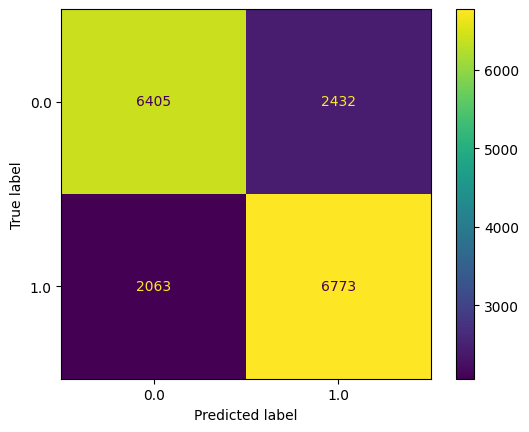

In [ ]:
y_pred = logreg_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      8837
         1.0       0.74      0.77      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



Mesmo com a otimização dos hiperparâmetros, não houve ganho significativo de melhora no valor de *recall* e a acurácia permaneceu a mesma.

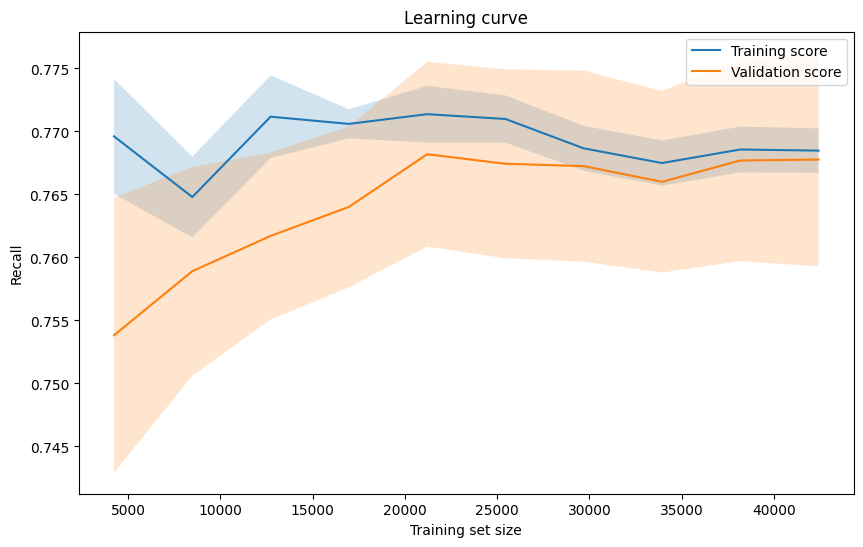

In [ ]:
# Gráfico para avaliar a curva de aprendizagem:

train_sizes, train_scores, test_scores = learning_curve(logreg_grid.best_estimator_, X_train, y_train, 
                                                        cv=splitter, scoring=metrica, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning curve')
plt.show()

A medida que mais dados são inseridos, há uma convergência das curvas de treino e teste, levando a pequena variância e aumentando o viés. No entanto a curva indica um bom aprendizado do modelo, conseguindo generalizar bem os dados de treino para os dados de teste. Não há indícios de over ou underfitting.

_________________________
_________________________


Regressão Logística com otimizaçao de hiperparâmetros e escalonamento com *dataset* reduzido em número de colunas. O critério de exclusão das colunas se baseou no índice de correlação entre as *features* e o *target* com o parâmetro aceitável > 15% de correlaçao, mas também foi avaliado a importância daquela *feature* para o contexto da análise, como exemplo dados sobre colesterol e diabetes.

In [ ]:
# Remoção de colunas

cols = ['Sex', 'Smoker',
       'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth']
df2 = df.drop(cols, axis=1)
df2.head()

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,1.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,1.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Regressão Logística utilizando features selecionadas, com escalonamento e otimização de hiperparâmetros:

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("logreg", LogisticRegression())]

pipe = Pipeline(lista_etapas)

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metrica = make_scorer(recall_score)

logreg_params = {"logreg__penalty" : ["l1", "l2"],
                  "logreg__solver" : ["lbfgs", "liblinear"],
                  "logreg__max_iter" : range(300, 1000, 100)}

logreg_grid = GridSearchCV(estimator=pipe, param_grid=logreg_params, scoring=metrica, cv=splitter)

logreg_grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__max_iter': range(300, 1000, 100),
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['lbfgs', 'liblinear']},
             scoring=make_scorer(recall_score))

In [ ]:
print("Logistic Regression best hyperparameters: ", logreg_grid.best_params_)

logreg_recall_df2 = cross_val_score(logreg_grid.best_estimator_, X_train, y_train, cv=splitter, scoring=metrica)
logreg_accuracy_df2 = cross_val_score(logreg_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='accuracy')

print("Logistic Regression mean recall score: ", logreg_recall_df2.mean())
print("Logistic Regression mean accuracy score: ", logreg_accuracy_df2.mean())

Logistic Regression best hyperparameters:  {'logreg__max_iter': 400, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Logistic Regression mean recall score:  0.7675432215726147
Logistic Regression mean accuracy score:  0.7467511294515943


[[6410 2427]
 [2073 6763]]


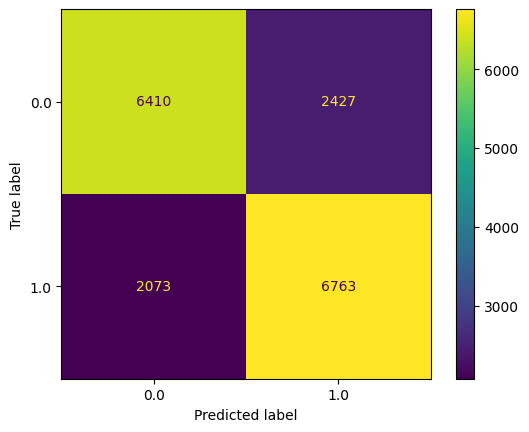

In [ ]:
y_pred = logreg_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8837
         1.0       0.74      0.77      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



Mesmo com a seleção de features, tornando o *dataset* menos complexo para ser trabalhado, os resultados obtidos continuam indicando acurácia de 75% e *recall* de 77% para o modelo de Regressão Logística.

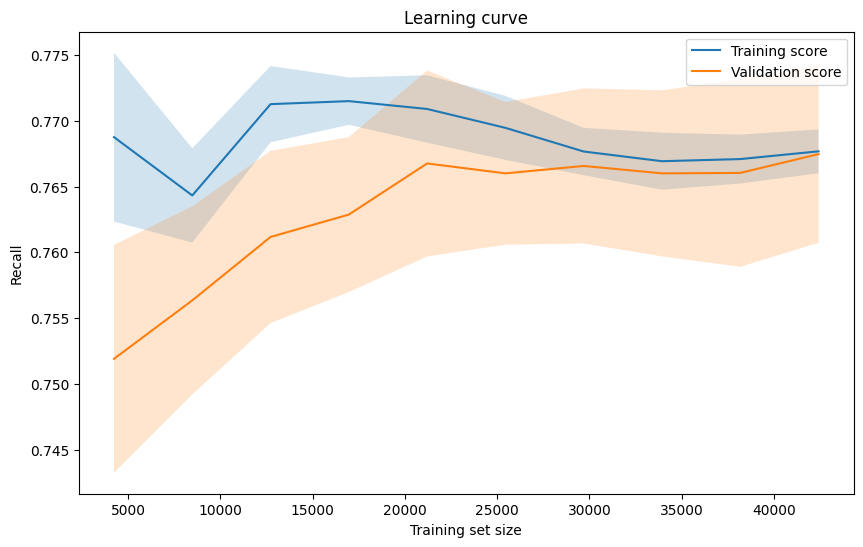

In [ ]:
# Gráfico para avaliar under/over fitting:

train_sizes, train_scores, test_scores = learning_curve(logreg_grid.best_estimator_, X_train, y_train, 
                                                        cv=splitter, scoring=metrica, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning curve')
plt.show()


O gráfico acima indica que o aprendizado aumenta a medida que o tamanho dos dados de treino aumentam. A remoção de algumas *features* diminui a complexidade refletida em uma variância ainda menor, com as curvas quase se encontrando.

________________________________
________________________________

**Segundo modelo**: K-Nearest Neighbors

K-Nearest Neighbors com otimizaçao de hiperparâmetros e escalonamento com *dataset* reduzido em número de colunas.

In [ ]:
# KNN dataset reduzido (média de 25min para rodar):

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metrica = make_scorer(recall_score)

knn_params = {"knn__weights" : ["distance", "uniform"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(3, 20)}

knn_grid = GridSearchCV(estimator=pipe, param_grid=knn_params, scoring=metrica, cv=splitter)

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(recall_score))

In [ ]:
print("KNN best hyperparameters: ", knn_grid.best_params_)

knn_recall_df2 = cross_val_score(knn_grid.best_estimator_, X_train, y_train, cv=splitter, scoring=metrica)
knn_accuracy_df2 = cross_val_score(knn_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='accuracy')

print("KNN mean recall score: ", knn_recall_df2.mean())
print("KNN mean accuracy score: ", knn_accuracy_df2.mean())

KNN best hyperparameters:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}
KNN mean recall score:  0.7861847458086662
KNN mean accuracy score:  0.7385842825135823


[[6025 2812]
 [1840 6996]]


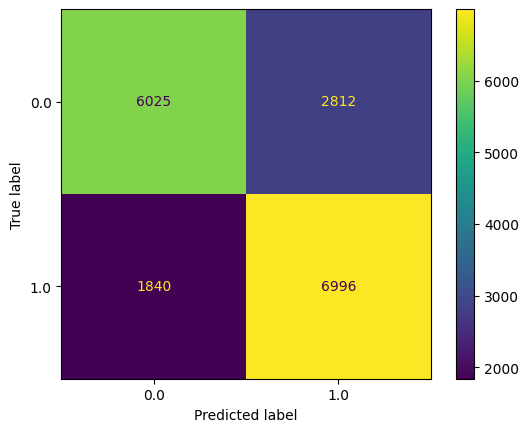

In [ ]:
y_pred = knn_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      8837
         1.0       0.71      0.79      0.75      8836

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



Neste caso houve aumento em 2% do valor do *recall*, no entendo há diminuição da acurácia em 1%. Além deste modelo possuir maior custo de processamento, há indícios de *overfitting*.

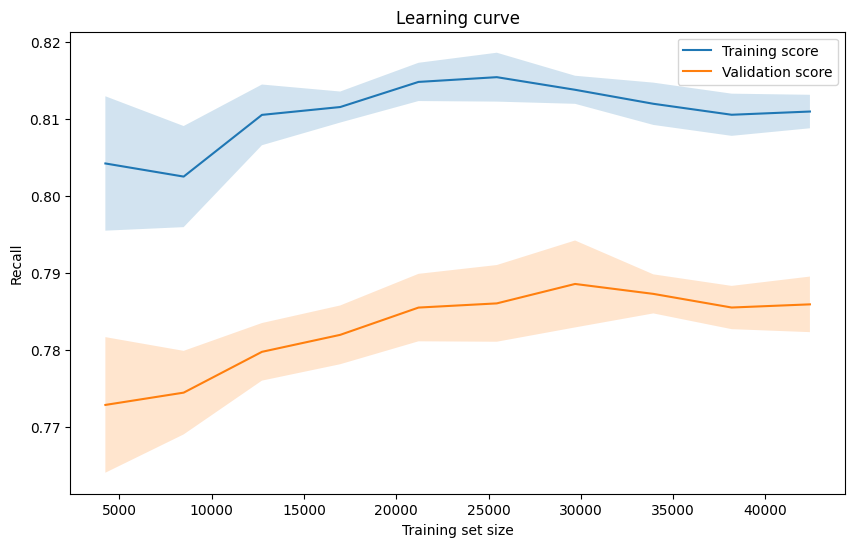

In [ ]:
# Gráfico para avaliar under/over fitting:

train_sizes, train_scores, test_scores = learning_curve(knn_grid.best_estimator_, X_train, y_train, 
                                                        cv=splitter, scoring=metrica, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning curve')
plt.show()

Como mostrado no gráfico, há uma boa aprendizagem nos dados de teste, porém o modelo não consegue generalizar bem para os dados de teste. Vê-se grande variância indicada no *gap* (distância) entre as curvas. Este é um caso de *overfitting*.

_____________________
_____________________

**Terceiro Modelo:** Decision Tree

Decision Tree com otimizaçao de hiperparâmetros utilizando o *dataset* reduzido em número de colunas.

In [ ]:
# Decision Tree

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

pipe = Pipeline([("dtc", DecisionTreeClassifier())])

dtc_params = {"dtc__criterion" : ["gini", "entropy"],
                  "dtc__splitter" : ["best", "random"],
                  "dtc__max_depth" : range(2, 11)}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

metrica = make_scorer(recall_score)

dtc_grid = GridSearchCV(estimator=pipe, param_grid=dtc_params, scoring=metrica, cv=splitter)

dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': range(2, 11),
                         'dtc__splitter': ['best', 'random']},
             scoring=make_scorer(recall_score))

In [ ]:
print("Decision Tree best hyperparameters: ", dtc_grid.best_params_)

dtc_recall = cross_val_score(dtc_grid.best_estimator_, X_train, y_train, cv=splitter, scoring=metrica)
dtc_accuracy = cross_val_score(dtc_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='accuracy')

print("Decision Tree mean recall score: ", dtc_recall.mean())
print("Decision Tree mean accuracy score: ", dtc_accuracy.mean())

Decision Tree best hyperparameters:  {'dtc__criterion': 'entropy', 'dtc__max_depth': 3, 'dtc__splitter': 'best'}
Decision Tree mean recall score:  0.8647335809684862
Decision Tree mean accuracy score:  0.7111601653774209


In [ ]:
df_dtc_grid = pd.DataFrame(dtc_grid.cv_results_)
df_dtc_grid.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtc__criterion,param_dtc__max_depth,param_dtc__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.029900,0.000512,0.009513,0.000058,entropy,3,best,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.870384,0.873843,0.839855,0.871402,0.868184,0.864734,0.012572,1
2,0.032724,0.001790,0.010331,0.000443,gini,3,best,"{'dtc__criterion': 'gini', 'dtc__max_depth': 3...",0.861530,0.862323,0.839855,0.871402,0.858781,0.858778,0.010369,2
6,0.042475,0.001216,0.009800,0.000084,gini,5,best,"{'dtc__criterion': 'gini', 'dtc__max_depth': 5...",0.797099,0.793012,0.769422,0.832336,0.818729,0.802120,0.021754,3
24,0.042222,0.000417,0.009706,0.000076,entropy,5,best,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.797664,0.802833,0.769422,0.827290,0.806318,0.800705,0.018605,4
27,0.033230,0.003146,0.009935,0.000046,entropy,6,random,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.795592,0.782436,0.749571,0.843551,0.826062,0.799442,0.033001,5


[[4843 3994]
 [1149 7687]]


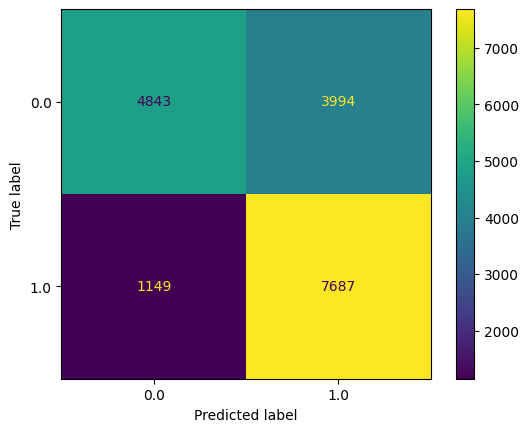

In [ ]:
y_pred = dtc_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.55      0.65      8837
         1.0       0.66      0.87      0.75      8836

    accuracy                           0.71     17673
   macro avg       0.73      0.71      0.70     17673
weighted avg       0.73      0.71      0.70     17673



Já neste modelo houve grande melhora no valor do *recall*, aumento de 10% frente ao *baseline* da Regressão Logística. Entretanto a acurácia do modelo diminuiu em 4%. Também é interessante observar que este modelo é mais eficiente em indicar se uma pessoa tem diabetes, uma vez que já tenha. Caso a pessoa não tiver diabetes, o valor é de 55%.

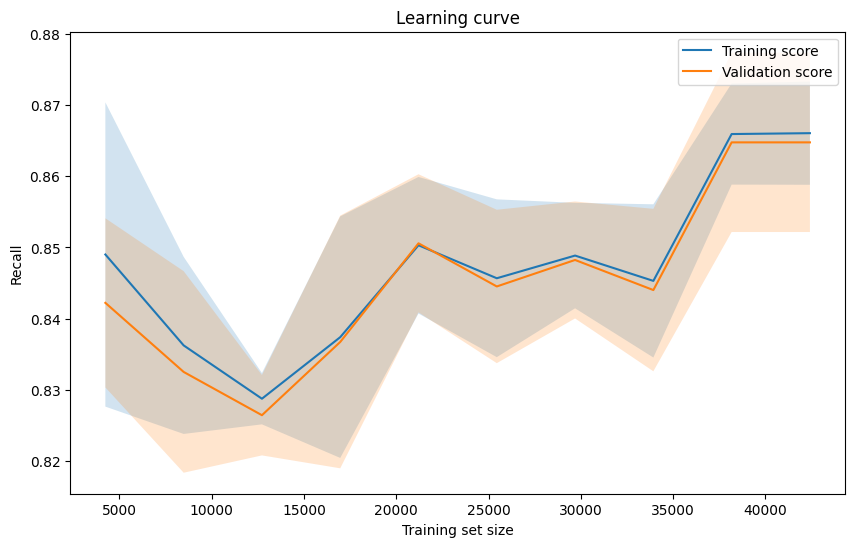

In [ ]:
# Gráfico para avaliar under/over fitting:

train_sizes, train_scores, test_scores = learning_curve(dtc_grid.best_estimator_, X_train, y_train, 
                                                        cv=splitter, scoring=metrica, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning curve')
plt.show()

De acordo com o gráfico é observado que o comportamento da curva dos dados de teste segue igualmente a curva de aprendizado do modelo, as vezes sobrepondo-a. Este é um caso delicado no qual outros fatores podem ser analisados para decidirmos se o aprendizado foi satisfatório.

[Text(0.5, 0.875, 'GenHlth <= 2.5\nentropy = 1.0\nsamples = 53019\nvalue = [26509, 26510]\nclass = y[1]'),
 Text(0.25, 0.625, 'HighBP <= 0.5\nentropy = 0.836\nsamples = 21211\nvalue = [15557, 5654]\nclass = y[0]'),
 Text(0.125, 0.375, 'Age <= 6.5\nentropy = 0.592\nsamples = 13008\nvalue = [11150, 1858]\nclass = y[0]'),
 Text(0.0625, 0.125, 'entropy = 0.344\nsamples = 5211\nvalue = [4876, 335]\nclass = y[0]'),
 Text(0.1875, 0.125, 'entropy = 0.712\nsamples = 7797\nvalue = [6274, 1523]\nclass = y[0]'),
 Text(0.375, 0.375, 'BMI <= 27.5\nentropy = 0.996\nsamples = 8203\nvalue = [4407, 3796]\nclass = y[0]'),
 Text(0.3125, 0.125, 'entropy = 0.937\nsamples = 3561\nvalue = [2304, 1257]\nclass = y[0]'),
 Text(0.4375, 0.125, 'entropy = 0.994\nsamples = 4642\nvalue = [2103, 2539]\nclass = y[1]'),
 Text(0.75, 0.625, 'HighBP <= 0.5\nentropy = 0.929\nsamples = 31808\nvalue = [10952, 20856]\nclass = y[1]'),
 Text(0.625, 0.375, 'Age <= 4.5\nentropy = 0.996\nsamples = 10147\nvalue = [5437, 4710]\nclass

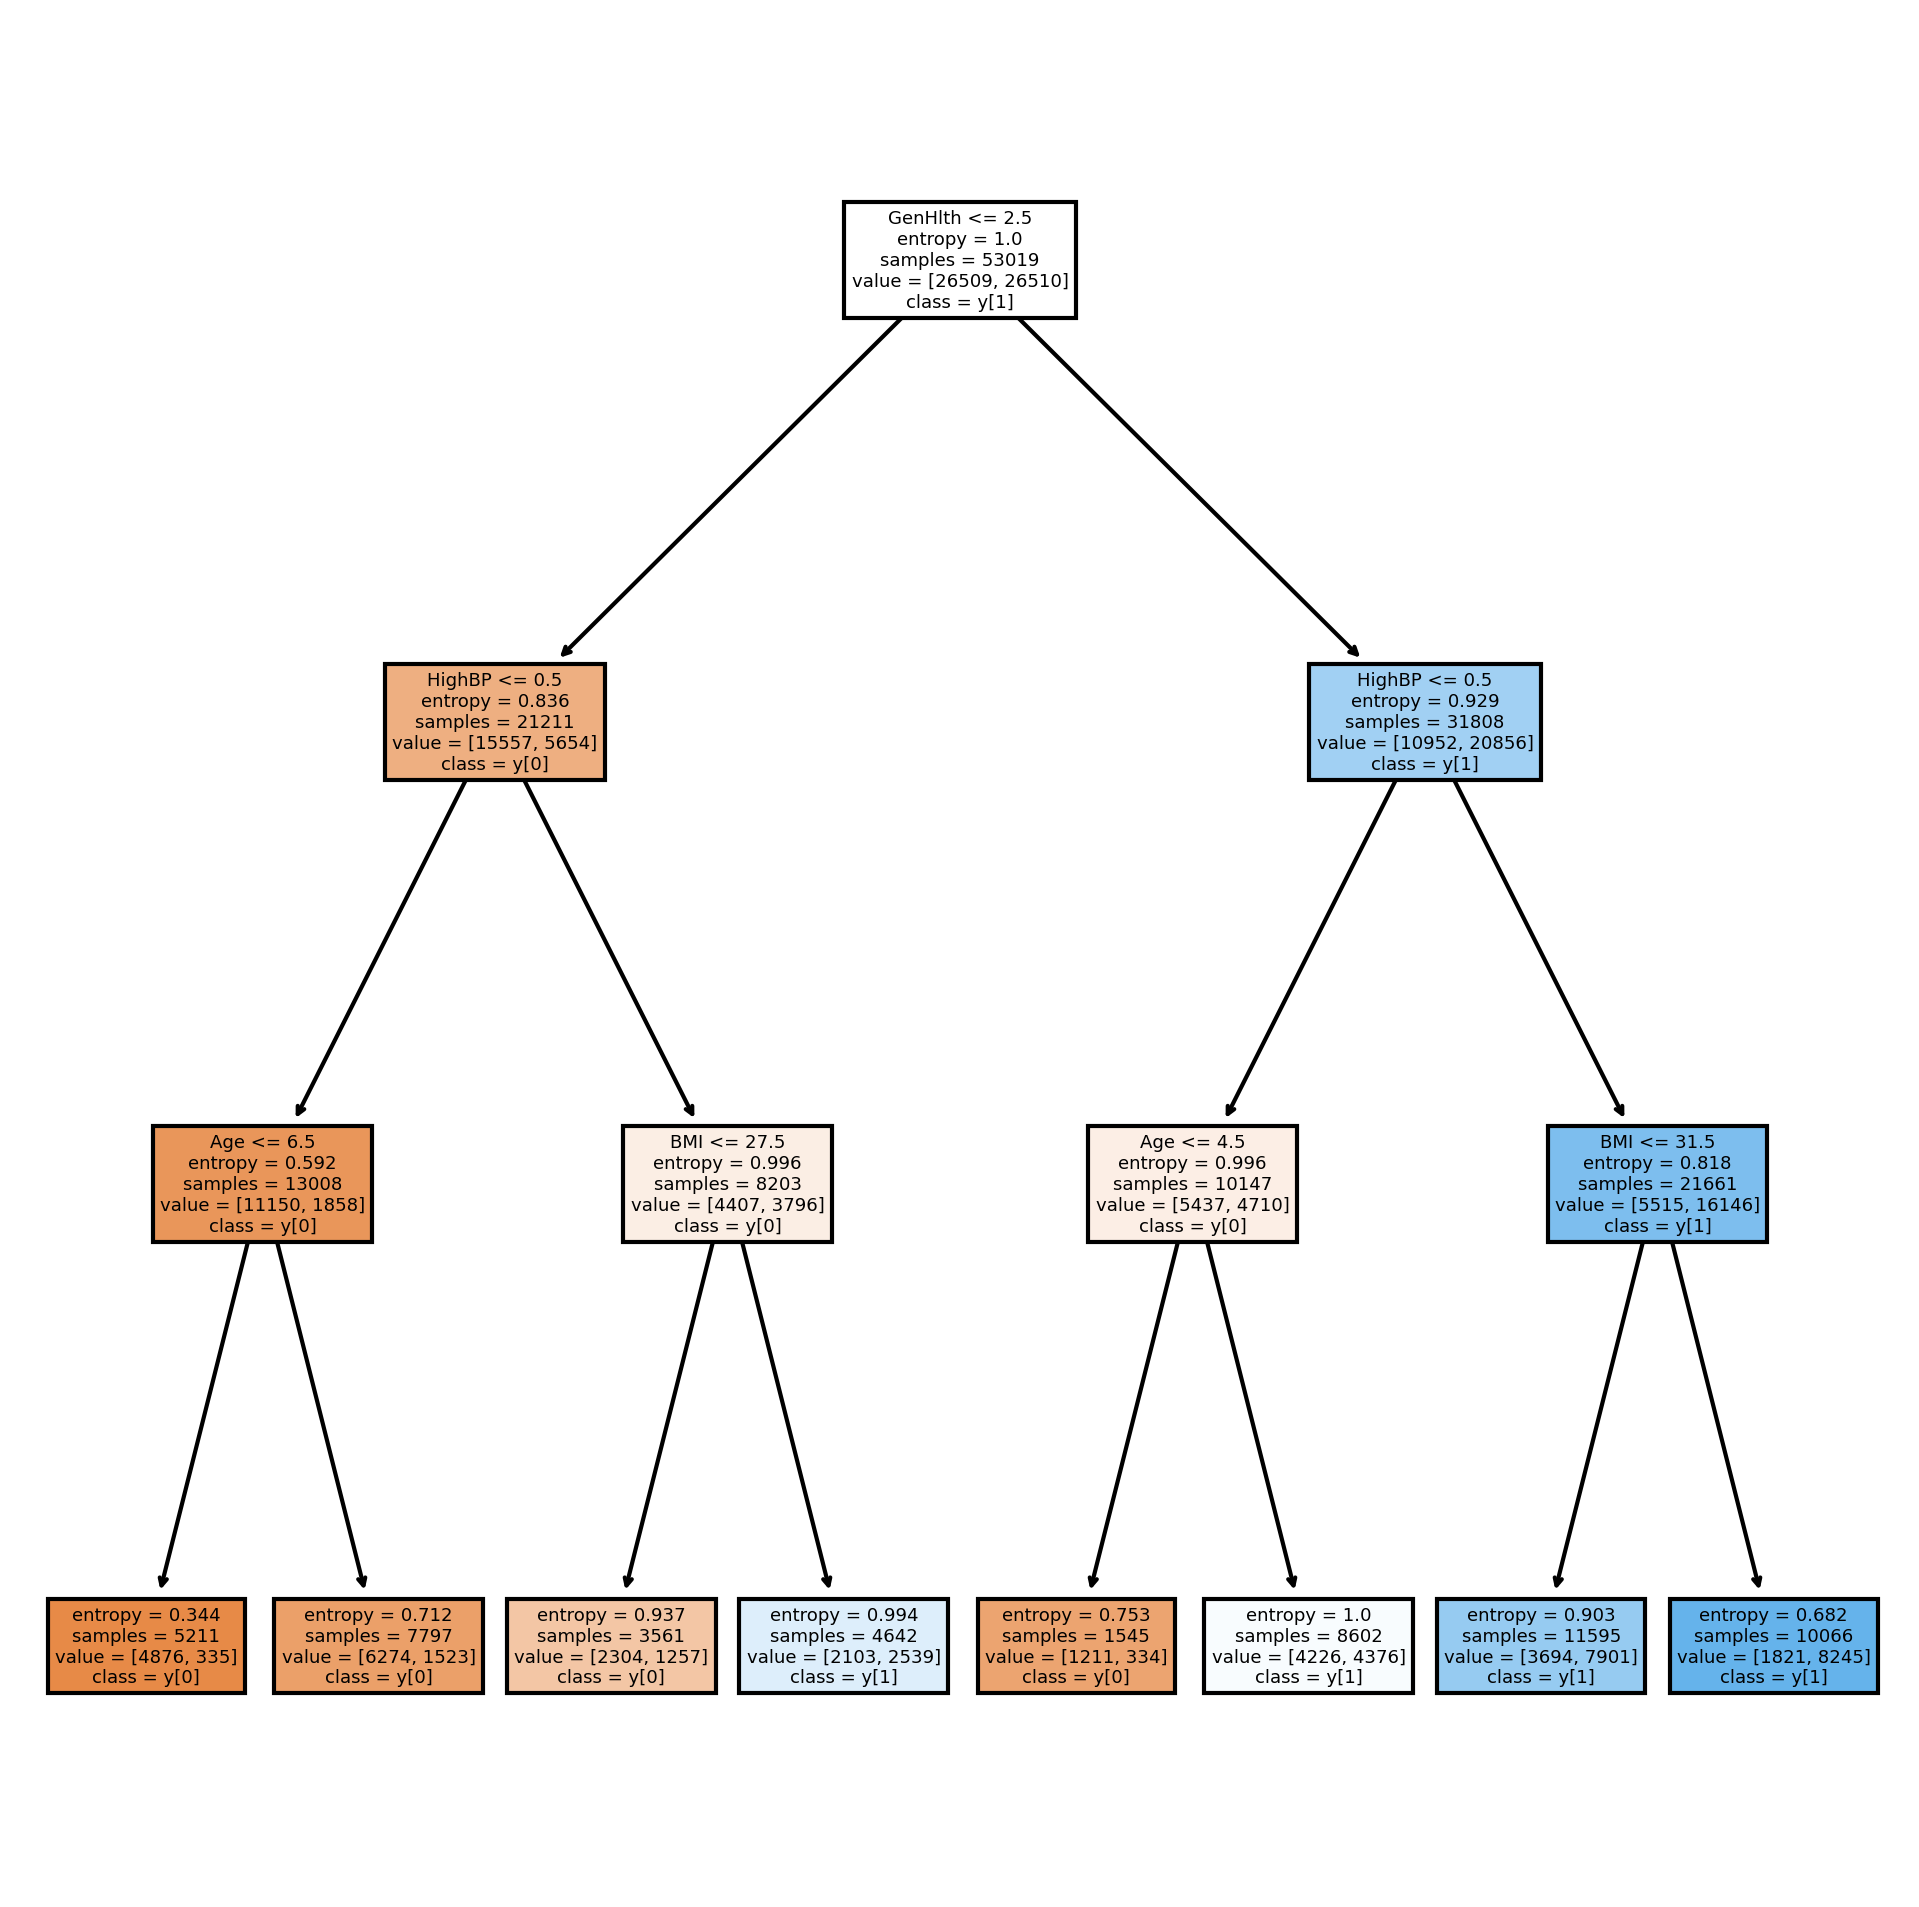

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=300)

plot_tree(dtc_grid.best_estimator_["dtc"], feature_names=X_train.columns, class_names=True, filled = True)

_____________________
_____________________

**Quarto Modelo:** Random Forest

Random Forest com otimizaçao de hiperparâmetros usando o *dataset* reduzido em número de colunas.

In [ ]:
# Random Forest (29min)

X = df2.drop('Diabetes', axis = 1)
y = df2['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

pipe = Pipeline([("rf", RandomForestClassifier())])

rf_params = {"rf__n_estimators" : range(100, 600, 100),
              "rf__max_depth" : range(3, 7),
              "rf__max_features" : ['sqrt', 'log2'],
              "rf__criterion" : ['entropy', 'gini']}

splitter = KFold(n_splits=5, shuffle=True, random_state=42)

rf_grid = GridSearchCV(estimator=pipe, param_grid=rf_params, scoring='recall', cv=splitter)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['entropy', 'gini'],
                         'rf__max_depth': range(3, 7),
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': range(100, 600, 100)},
             scoring='recall')

In [ ]:
print("Random Forest best hyperparameters: ", rf_grid.best_params_)

rf_recall = cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=splitter, scoring=metrica)
rf_accuracy = cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=splitter, scoring='accuracy')

print("Random Forest mean recall score: ", rf_recall.mean())
print("Random Forest mean accuracy score: ", rf_accuracy.mean())

Random Forest best hyperparameters:  {'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__max_features': 'sqrt', 'rf__n_estimators': 400}
Random Forest mean recall score:  0.7923110178814025
Random Forest mean accuracy score:  0.7455439897599851


[[6119 2718]
 [1808 7028]]


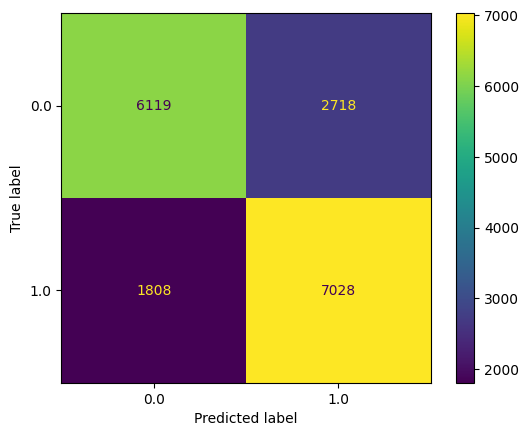

In [ ]:
y_pred = rf_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      8837
         1.0       0.72      0.80      0.76      8836

    accuracy                           0.74     17673
   macro avg       0.75      0.74      0.74     17673
weighted avg       0.75      0.74      0.74     17673



O modelo de Random Forest foi o que apresentou os melhores resultados. Em *recall* houve um ganho de 3%, com um total de 80% e a acurácia se manteve em 74%.

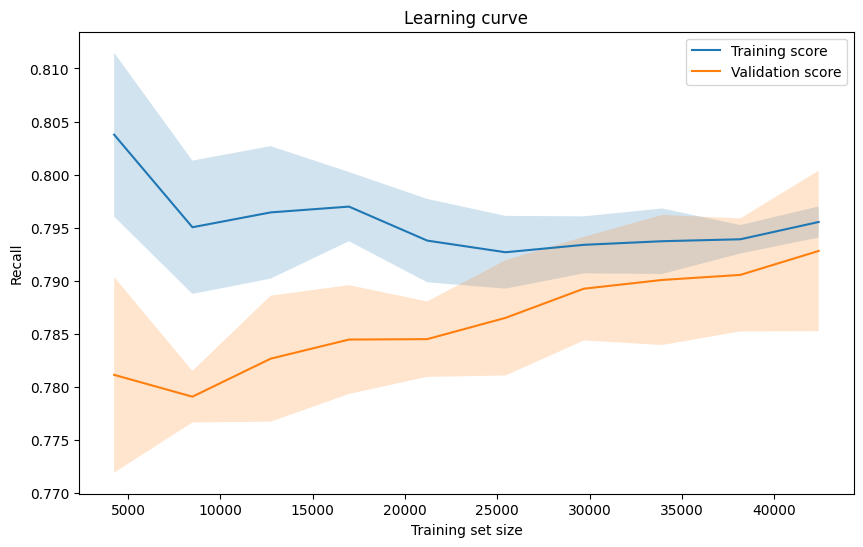

In [ ]:
# Gráfico para avaliar under/over fitting:

train_sizes, train_scores, test_scores = learning_curve(rf_grid.best_estimator_, X_train, y_train, 
                                                        cv=splitter, scoring=metrica, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.title('Learning curve')
plt.show()

As curvas de aprendizado mostram que o modelo consegue generalizar bem os dados de treino, com pequena variância.

## 4. Conclusões

Avaliando os dados, temos que:

In [ ]:
cols = ['Modelo', 'Recall', 'Accuracy']
linhas = {1 : ['RegLog (Baseline)', 0.77, 0.75],
          2 : ['RegLog (Otimizado)', logreg_recall_df2.mean(), logreg_accuracy_df2.mean()],
          3 : ['KNN', knn_recall_df2.mean(), knn_accuracy_df2.mean()],
          4 : ['Decision Tree', dtc_recall.mean(), dtc_accuracy.mean()],
          5 : ['Random Forest', rf_recall.mean(), rf_accuracy.mean()],
          6 : ['Valor Referência', 0.67, 0.77]
          }

df_results = pd.DataFrame.from_dict(linhas, orient='index', columns=cols)
df_results

,Modelo,Recall,Accuracy
1,RegLog (Baseline),0.770000,0.750000
2,RegLog (Otimizado),0.767543,0.746751
3,KNN,0.786185,0.738584
4,Decision Tree,0.864734,0.711160
5,Random Forest,0.792311,0.745544
6,Valor Referência,0.670000,0.770000


- Dados os modelos, os que mais se aproximam em valor de Acurácia são: Regressão Logística e o Random Forest. Mesmo assim os valores ainda são inferiores aos encontrados na referência.

- Quanto ao *Recall*, é observado maior valor absoluto utilizando o modelo Random Forest e Decision Tree.

- Os melhores modelos para resolução do problema são **Regressão Logística** e **Random Forest**, apesar do seu tempo maior de processamento. 

### **Estes modelos estão aptos para aplicação na produção?**

Não, pois os dados de referência apontam uma maior acurácia, apesar dos modelos produzidos apresenterem maiores valores de *recall**. Este é o parâmetro de maior importância, uma vez que o ideal é minimizar os resultados "falso negativos". Com os resultados obtidos, mesmo nos melhores cenários 86% para Decision Tree e 80% para Random Forest, por se tratar de um diagnóstico de saúde, esperava-se que este resultado fosse maior para termos um diagnóstico mais preciso. Além disso, há a possibilidade da base usada ser de valores fictícios, assim a otimização pode não ser genérica para dados reais.

## 6. Bibliografia

ANALYTICS VIDHYA. Diabetes Prediction using Machine Learning. Analytics Vidhya, Janeiro de 2022. Disponível em: https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/. Acesso em: 02 Abr. 2023.